In [6]:
'''Random forest assignment'''
#uploading file
import pandas as pd
df=pd.read_csv("glass.csv")
df.head(20)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1.0
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1.0
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1.0
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1.0
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1.0
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1.0


array([[<Axes: title={'center': 'RI'}>, <Axes: title={'center': 'Na'}>,
        <Axes: title={'center': 'Mg'}>],
       [<Axes: title={'center': 'Al'}>, <Axes: title={'center': 'Si'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'Ca'}>, <Axes: title={'center': 'Ba'}>,
        <Axes: title={'center': 'Fe'}>],
       [<Axes: title={'center': 'Type'}>, <Axes: >, <Axes: >]],
      dtype=object)

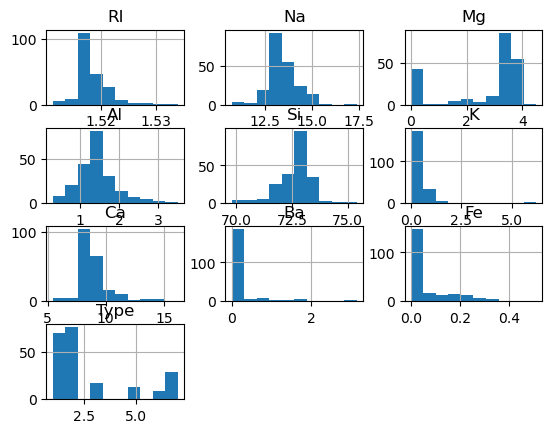

In [8]:
#Histogram for numerical valuariables
df.hist()


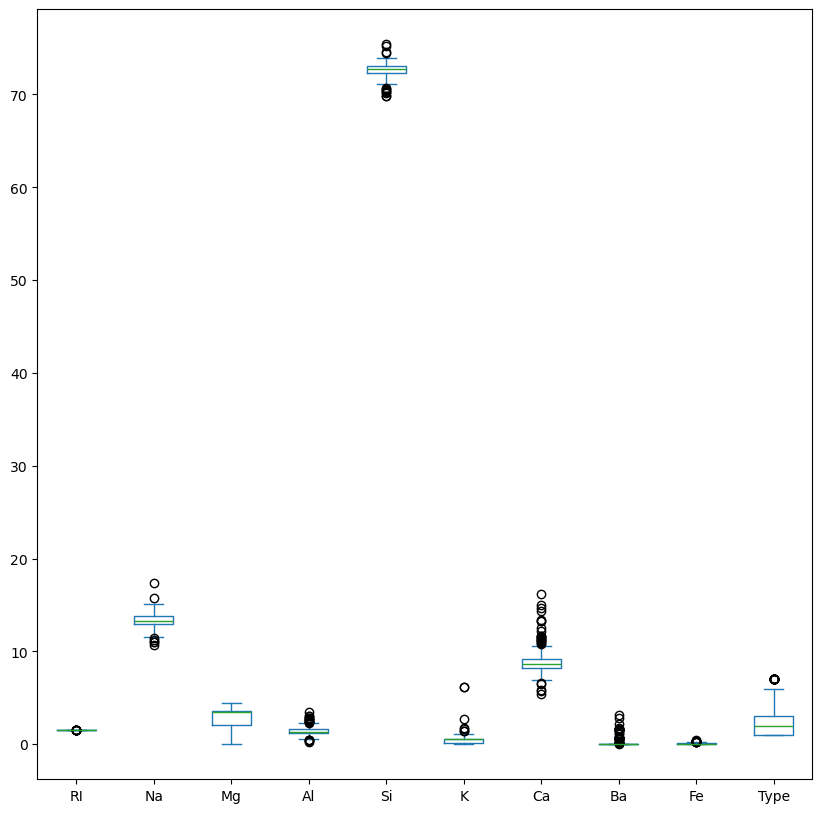

In [9]:
#Box plot for numerical variables

import matplotlib.pyplot as plt
df.plot(kind='box', figsize=(10,10))
plt.show()


            RI        Na        Mg        Al        Si         K        Ca  \
RI    1.000000 -0.191885 -0.122274 -0.407326 -0.542052 -0.289833  0.810403   
Na   -0.191885  1.000000 -0.273732  0.156794 -0.069809 -0.266087 -0.275442   
Mg   -0.122274 -0.273732  1.000000 -0.481799 -0.165927  0.005396 -0.443750   
Al   -0.407326  0.156794 -0.481799  1.000000 -0.005524  0.325958 -0.259592   
Si   -0.542052 -0.069809 -0.165927 -0.005524  1.000000 -0.193331 -0.208732   
K    -0.289833 -0.266087  0.005396  0.325958 -0.193331  1.000000 -0.317836   
Ca    0.810403 -0.275442 -0.443750 -0.259592 -0.208732 -0.317836  1.000000   
Ba   -0.000386  0.326603 -0.492262  0.479404 -0.102151 -0.042618 -0.112841   
Fe    0.143010 -0.241346  0.083060 -0.074402 -0.094201 -0.007719  0.124968   
Type -0.164237  0.502898 -0.744993  0.598829  0.151565 -0.010054  0.000952   

            Ba        Fe      Type  
RI   -0.000386  0.143010 -0.164237  
Na    0.326603 -0.241346  0.502898  
Mg   -0.492262  0.083060 -0.74

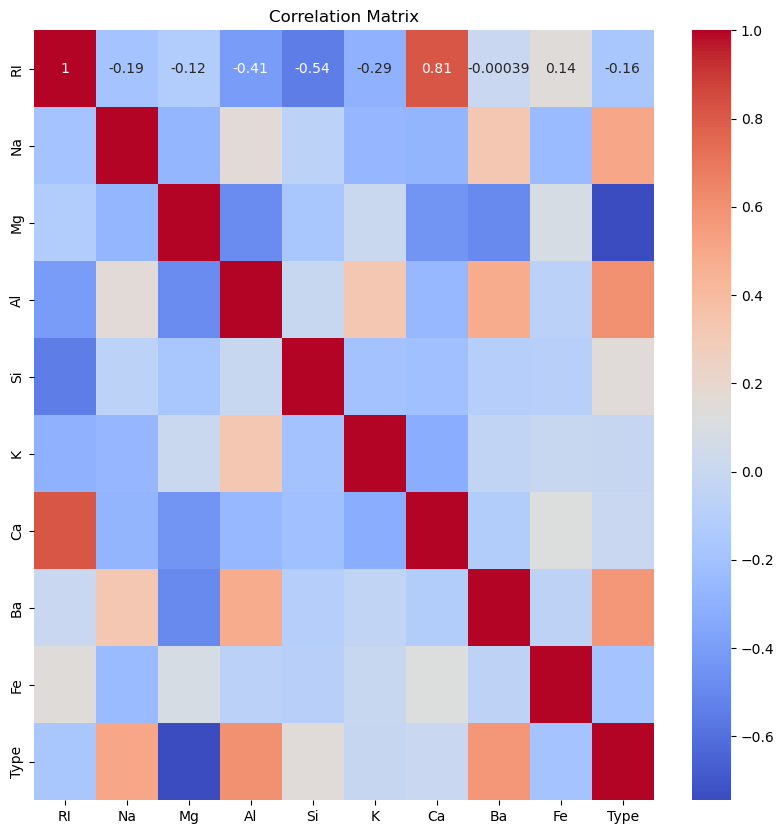

In [10]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Print the correlation matrix
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:
# Check for missing values
missing_values = df.isnull().sum()

# Print the count of missing values for each column
print(missing_values)

RI      785
Na      785
Mg      785
Al      785
Si      785
K       785
Ca      785
Ba      785
Fe      785
Type    785
dtype: int64


In [13]:
# Impute missing values with the mean
df = df.fillna(df.mean())

# Verify that there are no more missing values
print(df.isnull().sum())

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [14]:
#standarding continuous variables

from sklearn.preprocessing import StandardScaler

# Select the continuous variables to standardize
continuous_vars = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the continuous variables and transform them
df_standardized = df.copy()
df_standardized[continuous_vars] = scaler.fit_transform(df[continuous_vars])

# Display the first few rows of the standardized DataFrame
print(df_standardized.head())

         RI        Na        Mg        Al        Si         K        Ca  \
0  1.885924  0.615672  2.710781 -1.496095 -2.435182 -1.451292 -0.314944   
1 -0.538712  1.278685  1.374509 -0.368298  0.221071 -0.056637 -1.714947   
2 -1.558485  0.323947  1.299438  0.412485  0.948046 -0.355491 -1.791034   
3 -0.503055 -0.524709  1.509638 -0.671935 -0.114455  0.242218 -1.121467   
4 -0.674206 -0.365586  1.404538 -0.888820  1.199691  0.175806 -1.349729   

         Ba       Fe  Type  
0 -0.762428 -1.26709   1.0  
1 -0.762428 -1.26709   1.0  
2 -0.762428 -1.26709   1.0  
3 -0.762428 -1.26709   1.0  
4 -0.762428 -1.26709   1.0  


In [15]:
#  label encoding for categorical variables

from sklearn.preprocessing import LabelEncoder

# Assuming 'Type' is the categorical variable
label_encoder = LabelEncoder()
df_standardized['Type'] = label_encoder.fit_transform(df_standardized['Type'])

# Display the first few rows of the DataFrame with encoded 'Type'
print(df_standardized.head())

         RI        Na        Mg        Al        Si         K        Ca  \
0  1.885924  0.615672  2.710781 -1.496095 -2.435182 -1.451292 -0.314944   
1 -0.538712  1.278685  1.374509 -0.368298  0.221071 -0.056637 -1.714947   
2 -1.558485  0.323947  1.299438  0.412485  0.948046 -0.355491 -1.791034   
3 -0.503055 -0.524709  1.509638 -0.671935 -0.114455  0.242218 -1.121467   
4 -0.674206 -0.365586  1.404538 -0.888820  1.199691  0.175806 -1.349729   

         Ba       Fe  Type  
0 -0.762428 -1.26709     0  
1 -0.762428 -1.26709     0  
2 -0.762428 -1.26709     0  
3 -0.762428 -1.26709     0  
4 -0.762428 -1.26709     0  


In [16]:
# data partition

from sklearn.model_selection import train_test_split

# Assuming 'Type' is the target variable
X = df_standardized.drop('Type', axis=1)
y = df_standardized['Type']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (799, 9)
X_test shape: (200, 9)
y_train shape: (799,)
y_test shape: (200,)


In [17]:
#random forest classification from scikit-learn 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print a classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.80      0.92      0.86        13
           2       1.00      1.00      1.00       163
           3       1.00      1.00      1.00         1
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         6

    accuracy                           0.98       200
   macro avg       0.96      0.90      0.92       200
weighted avg       0.98      0.98      0.98       200



In [18]:
# Apply the Bagging

from sklearn.ensemble import BaggingClassifier
# Create a Bagging classifier with Random Forest as the base estimator
bagging_classifier = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=10, random_state=42)

# Train the classifier
bagging_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_bagging = bagging_classifier.predict(X_test)

# Evaluate the model
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Accuracy (Bagging):", accuracy_bagging)

# Print a classification report
print(classification_report(y_test, y_pred_bagging))

C:\Users\nazim\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy (Bagging): 0.97
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.75      0.92      0.83        13
           2       1.00      1.00      1.00       163
           3       0.00      0.00      0.00         1
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         6

    accuracy                           0.97       200
   macro avg       0.81      0.74      0.76       200
weighted avg       0.97      0.97      0.97       200



In [19]:
# Boosting method
from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoost classifier with DecisionTreeClassifier as the base estimator
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the classifier
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_adaboost = adaboost_classifier.predict(X_test)

# Evaluate the model
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print("Accuracy (AdaBoost):", accuracy_adaboost)

# Print a classification report
print(classification_report(y_test, y_pred_adaboost))

Accuracy (AdaBoost): 0.08
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.40      0.92      0.56        13
           2       0.00      0.00      0.00       163
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.33      1.00      0.50         1
           6       0.02      0.50      0.03         6

    accuracy                           0.08       200
   macro avg       0.11      0.35      0.16       200
weighted avg       0.03      0.08      0.04       200



C:\Users\nazim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nazim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nazim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
#xg boost

import xgboost as xgb

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy (XGBoost):", accuracy_xgb)

# Print a classification report
print(classification_report(y_test, y_pred_xgb))

Accuracy (XGBoost): 0.965
              precision    recall  f1-score   support

           0       0.90      0.64      0.75        14
           1       0.71      0.92      0.80        13
           2       0.99      1.00      1.00       163
           3       1.00      1.00      1.00         1
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         6

    accuracy                           0.96       200
   macro avg       0.94      0.87      0.89       200
weighted avg       0.97      0.96      0.96       200



In [21]:
#gradient boost

from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the classifier
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy (Gradient Boosting):", accuracy_gb)

# Print a classification report
print(classification_report(y_test, y_pred_gb))

Accuracy (Gradient Boosting): 0.95
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        14
           1       0.64      0.69      0.67        13
           2       1.00      1.00      1.00       163
           3       1.00      1.00      1.00         1
           4       1.00      0.50      0.67         2
           5       0.00      0.00      0.00         1
           6       0.86      1.00      0.92         6

    accuracy                           0.95       200
   macro avg       0.74      0.70      0.71       200
weighted avg       0.95      0.95      0.95       200



C:\Users\nazim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nazim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nazim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
'''conclusion:
Based on the precision, recall, F1-score, and support metrics, here's a comparison and conclusion:
Comparison:
1. Random Forest:
    - Consistently high precision, recall, and F1-score across classes (0.80-1.00).
    - Excellent performance on class 2 (163 samples).
2. XGBoost:
    - High precision, recall, and F1-score for most classes (0.71-1.00).
    - Slightly lower performance on class 0 (0.90 precision, 0.64 recall).
3. Gradient Boosting:
    - Good performance on most classes (0.64-1.00), but lower on class 0 (0.71 precision, 0.71 recall).
    - Notable drop in performance on class 5 (0.00 precision, recall).
4. Bagging:
    - High precision, recall, and F1-score for most classes (0.75-1.00).
    - Lower performance on class 3 (0.00 precision, recall).
5. AdaBoost:
    - Poor performance across all classes (0.00-0.56 precision, recall).
Conclusion:
- Random Forest and XGBoost are the top performers, with excellent results across most classes.
- Gradient Boosting and Bagging show good performance, but with some notable drops in specific classes.
- AdaBoost performs poorly, indicating that it may not be suitable for this problem or requires significant hyperparameter tuning.
